<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/Mask_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split

In [11]:
len(os.listdir('/content/drive/MyDrive/Image Classification'))

2

In [12]:
len(os.listdir('/content/drive/MyDrive/Image Classification/with_mask'))

1432

In [13]:
len(os.listdir('/content/drive/MyDrive/Image Classification/without_mask'))

1718

In [14]:
withmask=os.path.join('/content/drive/MyDrive/Image Classification','with_mask')
for img in os.listdir(withmask):
  print(img)

with_mask_1723.jpg
with_mask_1777.jpg
with_mask_1653.jpg
with_mask_1703.jpg
with_mask_1697.jpg
with_mask_1764.jpg
with_mask_1718.jpg
with_mask_1669.jpg
with_mask_1753.jpg
with_mask_1678.jpg
with_mask_1656.jpg
with_mask_1677.jpg
with_mask_1704.jpg
with_mask_1780.jpg
with_mask_1706.jpg
with_mask_1685.jpg
with_mask_1688.jpg
with_mask_1710.jpg
with_mask_1735.jpg
with_mask_1726.jpg
with_mask_1714.jpg
with_mask_1694.jpg
with_mask_1658.jpg
with_mask_1776.jpg
with_mask_1720.jpg
with_mask_1662.jpg
with_mask_1681.jpg
with_mask_1767.jpg
with_mask_1760.jpg
with_mask_1762.jpg
with_mask_1683.jpg
with_mask_1736.jpg
with_mask_1739.jpg
with_mask_1729.jpg
with_mask_1734.jpg
with_mask_1772.jpg
with_mask_1693.jpg
with_mask_1705.jpg
with_mask_1765.jpg
with_mask_1781.jpg
with_mask_1724.jpg
with_mask_1733.jpg
with_mask_1686.jpg
with_mask_1770.jpg
with_mask_1670.jpg
with_mask_1722.jpg
with_mask_1700.jpg
with_mask_1695.jpg
with_mask_1730.jpg
with_mask_1773.jpg
with_mask_1761.jpg
with_mask_1747.jpg
with_mask_17

In [15]:
# withmask=os.path.join('/content/drive/MyDrive/Image Classification','with_mask')
# for img in os.listdir(withmask):
# print(img)
no_mask=os.path.join('/content/drive/MyDrive/Image Classification','without_mask')
for img in os.listdir(no_mask):
  print(img)

without_mask_2484.jpg
without_mask_2438.jpg
without_mask_2456.jpg
without_mask_2409.jpg
without_mask_2440.jpg
without_mask_2410.jpg
without_mask_2386.jpg
without_mask_2502.jpg
without_mask_2482.jpg
without_mask_2501.jpg
without_mask_2399.jpg
without_mask_2392.jpg
without_mask_2449.jpg
without_mask_2506.jpg
without_mask_2428.jpg
without_mask_2471.jpg
without_mask_2485.jpg
without_mask_2507.jpg
without_mask_2412.jpg
without_mask_2474.jpg
without_mask_2423.jpg
without_mask_2490.jpg
without_mask_2382.jpg
without_mask_2383.jpg
without_mask_2468.jpg
without_mask_2478.jpg
without_mask_2450.jpg
without_mask_2431.jpg
without_mask_2378.jpg
without_mask_2459.jpg
without_mask_2489.jpg
without_mask_2475.jpg
without_mask_2443.jpg
without_mask_2444.jpg
without_mask_2496.jpg
without_mask_2466.jpg
without_mask_2442.jpg
without_mask_2460.jpg
without_mask_2500.jpg
without_mask_2405.jpg
without_mask_2379.jpg
without_mask_2470.jpg
without_mask_2473.jpg
without_mask_2488.jpg
without_mask_2448.jpg
without_ma

In [16]:
flat_data_arr=[]
target_arr=[]
categories=['with_mask','without_mask'] #0=with mask 1=withoutMask
data_dir='/content/drive/MyDrive/Image Classification'

In [17]:
for i in categories:
  print("Loading .... Categories")
  path=os.path.join(data_dir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))
print('Loaded Categories',i,'Successfully')

Loading .... Categories


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loading .... Categories
Loaded Categories without_mask Successfully


In [18]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
print(df)

         0         1         2         3         4         5         6      \
0     0.972549  0.749020  0.400000  0.972549  0.749020  0.400000  0.972549   
1     0.820913  0.715030  0.605168  0.823876  0.717891  0.607619  0.823060   
2     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4     0.917647  0.913725  0.898039  0.917647  0.913725  0.898039  0.917647   
...        ...       ...       ...       ...       ...       ...       ...   
3145  0.717647  0.717647  0.717647  0.717647  0.717647  0.717647  0.717647   
3146  0.173340  0.157654  0.224321  0.175927  0.160241  0.226907  0.176235   
3147  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3148  0.956863  0.956863  0.956863  0.956863  0.956863  0.956863  0.956863   
3149  0.770543  0.794073  0.848975  0.773241  0.796771  0.851673  0.780065   

         7         8         9      ...     67490     67491    

In [19]:
df.shape

(3150, 67500)

In [20]:
df['Target']=target

In [21]:
print(df)

             0         1         2         3         4         5         6  \
0     0.972549  0.749020  0.400000  0.972549  0.749020  0.400000  0.972549   
1     0.820913  0.715030  0.605168  0.823876  0.717891  0.607619  0.823060   
2     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4     0.917647  0.913725  0.898039  0.917647  0.913725  0.898039  0.917647   
...        ...       ...       ...       ...       ...       ...       ...   
3145  0.717647  0.717647  0.717647  0.717647  0.717647  0.717647  0.717647   
3146  0.173340  0.157654  0.224321  0.175927  0.160241  0.226907  0.176235   
3147  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3148  0.956863  0.956863  0.956863  0.956863  0.956863  0.956863  0.956863   
3149  0.770543  0.794073  0.848975  0.773241  0.796771  0.851673  0.780065   

             7         8         9  ...     67491     67492    

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [25]:
from sklearn import svm
classifier=svm.SVC()
classifier.fit(xtrain,ytrain)

SVC()

In [26]:
ypred=classifier.predict(xtest)
print(ypred)

[1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 0 1 1 0 0 1 1 

In [27]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.9142857142857143
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       445
           1       0.91      0.92      0.92       500

    accuracy                           0.91       945
   macro avg       0.91      0.91      0.91       945
weighted avg       0.91      0.91      0.91       945



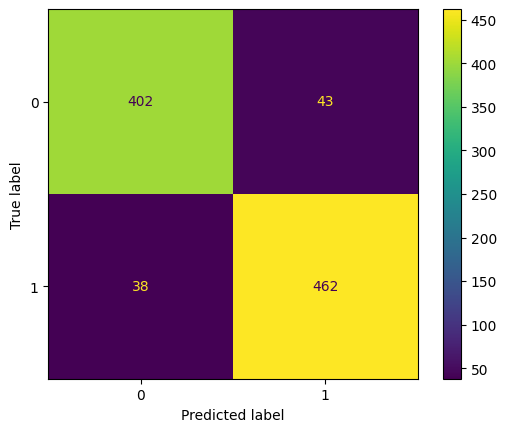

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

In [32]:
#here i uploaded a picture of a women face covered in mask
path='/content/drive/MyDrive/mask.jpg'
img=imread(path)
image=resize(img,(150,150,3)).flatten().reshape(1,-1)
classifier.predict(image)

array([0])